In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import time
import numba
# Import datasets, classifiers and performance metrics
import sklearn.linear_model as skl
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from hklearn import LogisticRegression

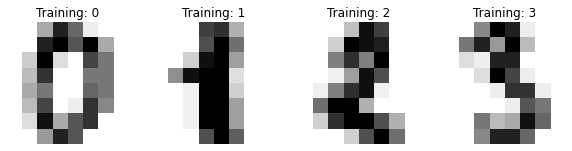

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)


In [3]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a logistic classifier
clf = skl.LogisticRegression(C = 0.01, n_jobs = 4, max_iter = 200, multi_class = 'ovr') 
clf2 = skl.LogisticRegression(C = 0.01, max_iter = 200, multi_class = 'ovr')
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=.8, shuffle=False)



# Learn the digits on the train subset
start_time = time.time()
#%timeit clf.fit(X_train, y_train)
%timeit clf.fit(X_train, y_train)
print(time.time() - start_time)
start_time = time.time()
#%timeit clf2.fit(X_train, y_train)
%timeit clf2.fit(X_train, y_train)
print(time.time() - start_time)
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
print(predicted.shape)

87.8 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.8980998992919922
139 ms ± 6.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
11.490157127380371
(1438,)


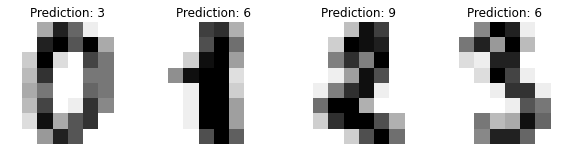

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, digits.images, predicted):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [5]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier LogisticRegression(C=0.01, max_iter=200, multi_class='ovr', n_jobs=4):
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       140
           1       0.90      0.63      0.74       144
           2       0.90      0.91      0.91       141
           3       0.95      0.82      0.88       145
           4       0.94      0.93      0.93       147
           5       0.86      0.90      0.88       146
           6       0.92      0.97      0.94       145
           7       0.97      0.88      0.92       144
           8       0.77      0.78      0.77       140
           9       0.67      0.90      0.77       146

    accuracy                           0.87      1438
   macro avg       0.88      0.87      0.87      1438
weighted avg       0.88      0.87      0.87      1438




Confusion matrix:
[[139   0   0   0   1   0   0   0   0   0]
 [  0  91   8   1   0   5   9   0  22   8]
 [  1   0 129   5   0   0   0   0   0   6]
 [  1   0   3 119   0   4   0   0   5  13]
 [  2   0   0   0 136   0   0   4   0   5]
 [  1   0   0   0   3 132   1   0   0   9]
 [  3   1   0   0   0   0 140   0   1   0]
 [  0   0   0   0   0   5   0 127   2  10]
 [  0   5   3   0   0   6   3   0 109  14]
 [  1   4   0   0   5   2   0   0   3 131]]


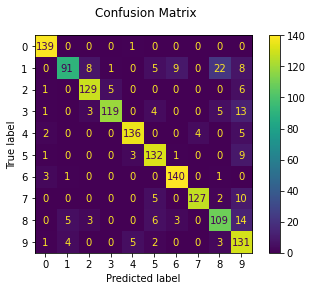

In [6]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [7]:
#Parallel regression threads = 2, threadpool
model_p = LogisticRegression(C = 0.01, maxiter = 200, n_jobs = 4, solver = 'lbfgs')
start_time = time.time()
%timeit model_p.fit(X_train, y_train)
print(time.time() - start_time)

Iter:  0
Iter: Iter:  2
 1
Iter:  Iter: 3
 Iter: 4Iter:  
Iter:  6
 7
Iter: 5Iter: 
 8 
9
Iter:  0
Iter:  Iter:  1Iter:  3
Iter: Iter:  
2 4
5
Iter: 
 6
Iter: Iter:  7 Iter: 8
 9

Iter:  Iter: 0
 1
Iter:  Iter: 2
 3
Iter:  Iter: 4
 Iter: 5 6

Iter: Iter:   8
7
Iter:  9
Iter:  Iter: 0
 1
Iter: Iter:  Iter: Iter:   2
 5
3Iter: 
 Iter: 6Iter: 
4  8

Iter: 7 9

Iter:  0
Iter:  1
Iter: Iter:  3
 2
Iter: Iter: Iter:  4
Iter: Iter:    7
 65
Iter:  8
9

Iter:  Iter: 0
Iter:  1Iter:  3
Iter:  2
Iter:  
4Iter: 
  6
5
Iter:  Iter:  78Iter: 

 9
Iter:  Iter: 0
Iter:   2
1
Iter: Iter: Iter:  3
 4
Iter:   5Iter: 6

 7Iter: Iter: 
 9
 8
Iter: Iter:   1
0Iter: 
 2
Iter: Iter:  3
 4
Iter: Iter: Iter:   Iter: 65 8
 7


Iter:  9
Iter:  Iter: 0
 1
Iter: Iter:  2Iter: Iter:  4
  
5
3
Iter: Iter:   Iter: Iter:  7
 69

8
Iter:  0
Iter:  1
Iter:  2
Iter:  3
Iter: Iter:   5
4Iter:  Iter: 6
 
Iter: 7
Iter:  8 9

Iter:  Iter: 0
 1
Iter: Iter:  2
 3Iter:  4

Iter:  5Iter: Iter: 
  7
6
Iter:  Iter:  98

Iter:  Ite

In [8]:
#Run training serially (n_jobs = None)
model_s = LogisticRegression(C = 0.01, maxiter = 200, solver = 'lbfgs')
start_time = time.time()
%timeit model_s.fit(X_train, y_train)
print(time.time() - start_time)

85.1 ms ± 5.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.107963800430298


In [9]:
y_pred_s = model_s.predict(X_test)
print(y_pred_s.shape)
print(metrics.confusion_matrix(y_test, y_pred_s))

y_pred_p = model_p.predict(X_test)
print(y_pred_p.shape)
print(metrics.confusion_matrix(y_test, y_pred_p))
#print(y_train)
#print(y_pred)
#disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")

#plt.show()

(1438,)
[[139   0   0   0   1   0   0   0   0   0]
 [  0  91   8   1   0   5   9   0  22   8]
 [  1   0 129   5   0   0   0   0   0   6]
 [  1   0   3 119   0   4   0   0   5  13]
 [  2   0   0   0 136   0   0   4   0   5]
 [  1   0   0   0   3 132   1   0   0   9]
 [  3   1   0   0   0   0 140   0   1   0]
 [  0   0   0   0   0   5   0 127   2  10]
 [  0   5   3   0   0   6   3   0 109  14]
 [  1   4   0   0   5   2   0   0   3 131]]
(1438,)
[[139   0   0   0   1   0   0   0   0   0]
 [  0  91   8   1   0   5   9   0  22   8]
 [  1   0 129   5   0   0   0   0   0   6]
 [  1   0   3 119   0   4   0   0   5  13]
 [  2   0   0   0 136   0   0   4   0   5]
 [  1   0   0   0   3 132   1   0   0   9]
 [  3   1   0   0   0   0 140   0   1   0]
 [  0   0   0   0   0   5   0 127   2  10]
 [  0   5   3   0   0   6   3   0 109  14]
 [  1   4   0   0   5   2   0   0   3 131]]


In [10]:
print(f"Classification report for serial home made classifier :\n"
      f"{metrics.classification_report(y_test, y_pred_s)}\n")

Classification report for serial home made classifier :
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       140
           1       0.90      0.63      0.74       144
           2       0.90      0.91      0.91       141
           3       0.95      0.82      0.88       145
           4       0.94      0.93      0.93       147
           5       0.86      0.90      0.88       146
           6       0.92      0.97      0.94       145
           7       0.97      0.88      0.92       144
           8       0.77      0.78      0.77       140
           9       0.67      0.90      0.77       146

    accuracy                           0.87      1438
   macro avg       0.88      0.87      0.87      1438
weighted avg       0.88      0.87      0.87      1438




In [11]:
print(f"Classification report for parallel home made classifier :\n"
      f"{metrics.classification_report(y_test, y_pred_p)}\n")

Classification report for parallel home made classifier :
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       140
           1       0.90      0.63      0.74       144
           2       0.90      0.91      0.91       141
           3       0.95      0.82      0.88       145
           4       0.94      0.93      0.93       147
           5       0.86      0.90      0.88       146
           6       0.92      0.97      0.94       145
           7       0.97      0.88      0.92       144
           8       0.77      0.78      0.77       140
           9       0.67      0.90      0.77       146

    accuracy                           0.87      1438
   macro avg       0.88      0.87      0.87      1438
weighted avg       0.88      0.87      0.87      1438


